In [ ]:
!pip install torchviz==0.0.3 -q


In [4]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 1.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.7/450.7 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.4.0
    Uninstalling fsspec-2023.4.0:
      Successfully uninstalled fsspec-2023.4.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.3 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import timm #torch model
import transformers
from torchviz import make_dot #to visualize model

/home/somya/miniconda3/envs/dl/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.l1 = torch.nn.Linear(13,64)
        self.l2 = torch.nn.ReLU()
        self.l3 = torch.nn.Linear(64,32)
        self.l4 = torch.nn.ReLU()
        self.l5 = torch.nn.Linear(32,10)
    def forward(self,x):
        l1_out = self.l1(x)
        l2_out = self.l2(l1_out)
        l3_out = self.l3(l2_out)
        l4_out = self.l4(l3_out)
        final = self.l5(l4_out)
        return final
        
model = MLP()
model

MLP(
  (l1): Linear(in_features=13, out_features=64, bias=True)
  (l2): ReLU()
  (l3): Linear(in_features=64, out_features=32, bias=True)
  (l4): ReLU()
  (l5): Linear(in_features=32, out_features=10, bias=True)
)

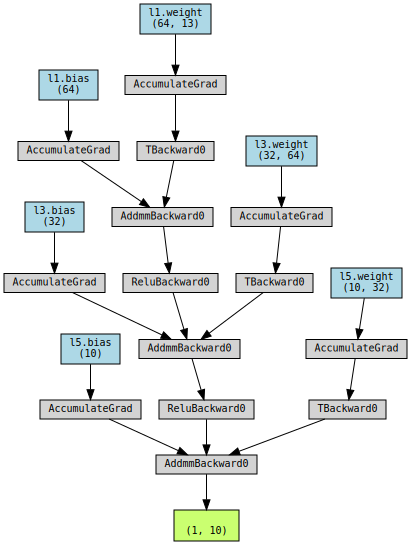

In [15]:
make_dot(model(torch.rand(1,13)),params=dict(model.named_parameters()))

In [16]:
torch.save(model.state_dict(),"model_weights.pth")
model.load_state_dict(torch.load("model_weights.pth"))

<All keys matched successfully>

In [17]:
for things in model.state_dict().items():
    print(things[0],things[1].shape)

l1.weight torch.Size([64, 13])
l1.bias torch.Size([64])
l3.weight torch.Size([32, 64])
l3.bias torch.Size([32])
l5.weight torch.Size([10, 32])
l5.bias torch.Size([10])


In [18]:
torch.nn.ModuleList

torch.nn.modules.container.ModuleList

In [19]:
class MLP2(torch.nn.Module):
    def __init__(self):
        super().__init___()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Linear(13,64),
            torch.nn.ReLU()
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Linear(64,32),
            torch.nn.ReLU()
        )
        self.layer3 = torch.nn.Linear(32,10)
    def forward(self,x):
        
        

In [26]:
sample_rgb_image = torch.rand(15,3,224,224)
sample_gray_image = torch.rand(1,1,224,224)

In [21]:
vgg11_model = torch.hub.load("pytorch/vision:v0.10.0",'vgg11',pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/somya/.cache/torch/hub/v0.10.0.zip
/home/somya/miniconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/somya/miniconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /home/somya/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:12<00:00, 42.6MB/s] 


In [30]:
vgg11_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [29]:
output1 = vgg11_model(torch.rand([13,3,28,28]))


RuntimeError: Given input size: (512x1x1). Calculated output size: (512x0x0). Output size is too small

In [28]:
output1.shape

torch.Size([15, 1000])

In [ ]:
vgg11_model.classifier[6] = 